In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from decimal import Decimal
import datetime
import folium #Longitude and Lattitude mapping.


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error 

#Import machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

import seaborn as sns
from itertools import *
import os
import folium
from folium import plugins
from folium.plugins import MarkerCluster 
from IPython.display import HTML, display

In [2]:
calendar = pd.read_csv('2019_hongkong_calendar.csv')
detail_listing = pd.read_csv('2019_hongkong_listings.csv') #detailed listings
detail_reviews = pd.read_csv('2019_hongkong_reviews.csv') #detailed reviews


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
detail_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,69074,https://www.airbnb.com/rooms/69074,20191119140341,2019-11-19,Beautiful oasis of plants & art @ best location,An ideal Hong location any visitor--hip withou...,"Filled with plants and art, this one bedroom u...",An ideal Hong location any visitor--hip withou...,none,"In the upper part of trendy, hip Sheung Wan, w...",...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.25
1,103760,https://www.airbnb.com/rooms/103760,20191119140341,2019-11-19,Central Centre 5 min walk to/from Central MTR,"Located right in the heart of Central, this 2 ...",You really can't ask for a better location. I...,"Located right in the heart of Central, this 2 ...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,12,8,4,0,2.59
2,132773,https://www.airbnb.com/rooms/132773,20191119140341,2019-11-19,Fabulous 2 Bdrm Aprt Open kitchen,"Nicely decorated, spacious 2 bedroom apartment...",This is a large 2 Bedroom apartment that is ne...,"Nicely decorated, spacious 2 bedroom apartment...",none,The Sheung Wan neighbourhood is ever changing ...,...,f,f,strict_14_with_grace_period,f,f,12,8,4,0,2.70
3,133390,https://www.airbnb.com/rooms/133390,20191119140341,2019-11-19,"Soho, Hong Kong 1 bedroom flat",My cozy one bedroom apartment is located in th...,My one-bedroom apartment (about 500 sq. feet) ...,My cozy one bedroom apartment is located in th...,none,Soho in Central is right in the middle of all ...,...,f,f,moderate,f,f,1,1,0,0,0.26
4,163664,https://www.airbnb.com/rooms/163664,20191119140341,2019-11-19,Soho off Hollywood Road P4,"Fun Fact: Possession St, is where the British ...",Located in the most convenient spot in Hong Ko...,"Fun Fact: Possession St, is where the British ...",none,Fantastic traditional Hong Kong neighborhood w...,...,f,f,strict_14_with_grace_period,f,f,12,8,4,0,2.17


In [4]:
detail_listing.shape

(12485, 106)

In [5]:
detail_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,69074,181973,2011-02-14,358597,Chi Yan,Lovely apartment in a great location that quic...
1,69074,252237,2011-05-05,467243,Doreen,"As a former resident of HK, I can say that Amy..."
2,69074,400484,2011-07-27,696753,Michael,I stayed in this Apt for about 12 days. Such a...
3,69074,411022,2011-08-01,40901,Donna,"Amy's cute, comfortable apartment is in the he..."
4,69074,497498,2011-09-03,341618,Melissa,Amy was the perfect host - extremely communica...


In [6]:
detail_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253301 entries, 0 to 253300
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     253301 non-null  int64 
 1   id             253301 non-null  int64 
 2   date           253301 non-null  object
 3   reviewer_id    253301 non-null  int64 
 4   reviewer_name  253298 non-null  object
 5   comments       253129 non-null  object
dtypes: int64(3), object(3)
memory usage: 11.6+ MB


In [7]:
detail_reviews['reviewer_id'].value_counts()#.loc[lambda x : x>10]

5750451      37
8269040      32
41131929     30
274127887    25
431135       23
             ..
166259381     1
167303859     1
18928306      1
12256100      1
200802304     1
Name: reviewer_id, Length: 226882, dtype: int64

In [8]:
detail_reviews.groupby('listing_id')['reviewer_id'].value_counts().loc[lambda x : x>5].sort_values(ascending=False)

listing_id  reviewer_id
9096444     2329317        20
8645263     24779930       20
21846948    5750451        14
22277128    12542251       12
7280098     41447482       12
14961766    1323897         7
13073277    79196561        7
12874832    132544023       7
7931794     14765464        7
5242151     23693530        7
10344180    69603281        6
4593121     193793625       6
4297195     14638629        6
714585      205189686       6
278277      206303755       6
Name: reviewer_id, dtype: int64

In [9]:
detail_reviews.loc[detail_reviews['reviewer_id'] == 24779930].sort_values(by=['date'])

,listing_id,id,date,reviewer_id,reviewer_name,comments
78634,8645263,74798629,2016-05-16,24779930,Yujing,"非常感谢,我们聊天就像朋友一样｡哈哈"
78637,8645263,77305079,2016-05-31,24779930,Yujing,"真的非常好,我最爱的Sophie"
78638,8645263,77517018,2016-06-01,24779930,Yujing,超级好的体验!喜欢跟她一起做面包
78643,8645263,82398401,2016-06-27,24779930,Yujing,超好
78644,8645263,82448060,2016-06-27,24779930,Yujing,Sophie是我见过最好的房东
78647,8645263,84020238,2016-07-05,24779930,Yujing,好到已经没词了……哈哈
78653,8645263,89011729,2016-07-26,24779930,Yujing,Sophie是家人!哈哈
78654,8645263,89118008,2016-07-26,24779930,Yujing,睡她的地板都好开心哈哈哈哈
78656,8645263,89687367,2016-07-29,24779930,Yujing,就是超级好的朋友!
78660,8645263,93708085,2016-08-13,24779930,Yujing,她的耐心和健谈让我在香港有了家一样的安全感.非常感谢这位朋友!


The same reviewer has left 20 feedback to the same listing! Let's look at one more.. 



In [10]:
detail_reviews.loc[detail_reviews['reviewer_id'] == 5750451].sort_values(by=['date'])

,listing_id,id,date,reviewer_id,reviewer_name,comments
21106,2140411,287245985,2018-07-08,5750451,Stephan,"Convenient location, simple and efficient chec..."
148278,17595955,328707828,2018-09-27,5750451,Stephan,Very convenient location (50 meters or so from...
211744,25570636,334739416,2018-10-10,5750451,Stephan,"Very convenient location, accurate instruction..."
21115,2140411,341084830,2018-10-26,5750451,Stephan,My second stay - Very clean and neat - reliabl...
210950,25505293,346266171,2018-11-08,5750451,Stephan,I've stayed several time at Henri's place now ...
37010,4362354,348974810,2018-11-16,5750451,Stephan,Very pleasant stay in North Point. Clean room ...
158038,18676100,350688483,2018-11-20,5750451,Stephan,"Central location in TST, lots of restaurants n..."
185136,21846948,351485627,2018-11-23,5750451,Stephan,"Very nice unit - very clean, relatively spacio..."
222459,27917900,353878790,2018-11-30,5750451,Stephan,I've now stayed a couple of times at Henri's p...
226916,28899049,356071058,2018-12-07,5750451,Stephan,Lovely space in a great location. James is ver...


In [11]:
#calendar.info()
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,133390,2019-11-19,f,$939.00,$939.00,2,60
1,823455,2019-11-19,t,$828.00,$828.00,3,99
2,823455,2019-11-20,t,$828.00,$828.00,3,99
3,823455,2019-11-21,t,$828.00,$828.00,3,99
4,823455,2019-11-22,t,$960.00,$960.00,3,99


In [12]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4557025 entries, 0 to 4557024
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   listing_id      int64 
 1   date            object
 2   available       object
 3   price           object
 4   adjusted_price  object
 5   minimum_nights  int64 
 6   maximum_nights  int64 
dtypes: int64(3), object(4)
memory usage: 243.4+ MB


Let's clean some data on calendar dataset

In [13]:
calendar[calendar['price'] > calendar['adjusted_price']]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
17483,1825634,2020-01-19,t,$350.00,$315.00,1,28
17484,1825634,2020-01-20,t,$350.00,$315.00,1,28
17485,1825634,2020-01-21,t,$350.00,$315.00,1,28
17486,1825634,2020-01-22,t,$350.00,$315.00,1,28
17487,1825634,2020-01-23,t,$350.00,$315.00,1,28
...,...,...,...,...,...,...,...
4542421,39736014,2020-11-13,t,$367.00,$352.00,1,1125
4542422,39736014,2020-11-14,t,$367.00,$352.00,1,1125
4542423,39736014,2020-11-15,t,$367.00,$352.00,1,1125
4542424,39736014,2020-11-16,t,$367.00,$352.00,1,1125


In [14]:
#convert date into date datatype
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['month'] = pd.to_datetime(calendar['date']).dt.month
calendar['year'] = pd.to_datetime(calendar['date']).dt.year
calendar['day_of_week'] = pd.to_datetime(calendar['date']).dt.dayofweek

#convert prices into numbers
calendar['price'] = pd.to_numeric(calendar['price'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')
calendar['adjusted_price'] = pd.to_numeric(calendar['adjusted_price'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')

#convert available into boolean
d = {'t': True, 'f': False}
calendar['available'] = calendar['available'].map(d)

In [15]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4557025 entries, 0 to 4557024
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       bool          
 3   price           float64       
 4   adjusted_price  float64       
 5   minimum_nights  int64         
 6   maximum_nights  int64         
 7   month           int64         
 8   year            int64         
 9   day_of_week     int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(6)
memory usage: 317.3 MB


In [16]:
calendar.tail()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,month,year,day_of_week
4557020,40212237,2020-11-13,True,399.0,399.0,1,1125,11,2020,4
4557021,40212237,2020-11-14,True,399.0,399.0,1,1125,11,2020,5
4557022,40212237,2020-11-15,True,399.0,399.0,1,1125,11,2020,6
4557023,40212237,2020-11-16,True,399.0,399.0,1,1125,11,2020,0
4557024,40212237,2020-11-17,True,399.0,399.0,1,1125,11,2020,1


In [17]:
#filter calendar minimum_nights for less than 28 days > short term rental
calendar[calendar['minimum_nights'] < 28]['listing_id'].unique().size

10235

In [18]:
short_term = (calendar[calendar['minimum_nights'] < 28]['listing_id'].unique().size)/detail_listing.shape[0]
short_term

0.8197837404885863

82% short term rental.

In [19]:
calendar_test = calendar.groupby('listing_id')['date'].count().reset_index()
calendar_test

,listing_id,date
0,69074,365
1,103760,365
2,132773,365
3,133390,365
4,163664,365
...,...,...
12480,40197100,365
12481,40211186,365
12482,40212167,365
12483,40212237,365


In [20]:
calendar_test['date'].value_counts()

365    12485
Name: date, dtype: int64

There are 365 rows for each listing. 

In [21]:
calendar_test = calendar.groupby('available')['price'].value_counts()

calendar_test

available  price  
False      500.0      83003
           400.0      74868
           600.0      69251
           800.0      63006
           700.0      61598
                      ...  
True       13269.0        1
           13324.0        1
           13770.0        1
           13982.0        1
           14129.0        1
Name: price, Length: 6486, dtype: int64

In [22]:
calendar['available'].value_counts()/calendar.shape[0]

False    0.527283
True     0.472717
Name: available, dtype: float64

47% of the listings are marked available.

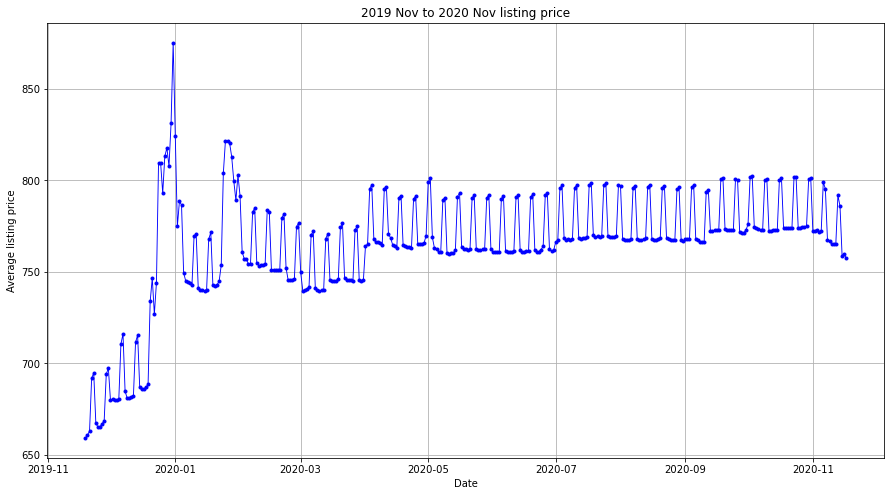

In [23]:
# Lets find out if there are a price trend for the upcoming year.

# Taking average
calendar_mean = calendar.dropna().groupby('date')['adjusted_price'].mean().reset_index()

# plot avg listings prices over time.
plt.figure(figsize=(15, 8))
plt.plot(calendar_mean.date, calendar_mean.adjusted_price, color='b', marker='.', linewidth=0.9)
plt.title("2019 Nov to 2020 Nov listing price")
plt.xlabel('Date')
plt.ylabel('Average listing price')
plt.grid()

In [24]:
calendar_mean = calendar.dropna().groupby(['year','month'])['adjusted_price'].mean().reset_index()

calendar_mean

,year,month,adjusted_price
0,2019,11,674.458590
1,2019,12,729.253016
2,2020,1,770.328862
3,2020,2,761.478370
4,2020,3,751.096536
5,2020,4,773.031406
6,2020,5,772.081097
7,2020,6,769.482054
8,2020,7,776.961281
9,2020,8,776.109693


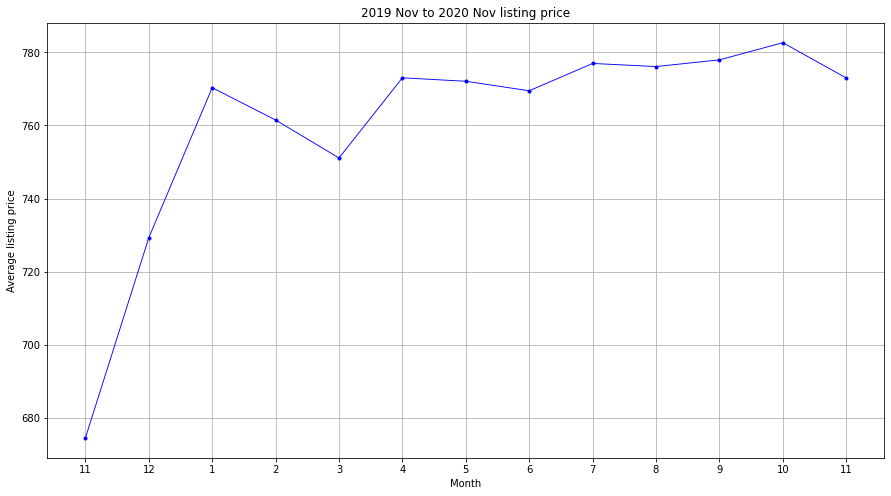

In [25]:
# Lets find out monthly price trend

# Taking average
calendar_mean = calendar.dropna().groupby(['year','month'])['adjusted_price'].mean().reset_index()

# plot avg listings prices over time.
plt.figure(figsize=(15, 8))
labels = ['11','12','1','2','3','4','5','6','7','8','9','10','11']
plt.plot(calendar_mean.index, calendar_mean.adjusted_price, color='b', marker='.', linewidth=0.9)
plt.xticks(calendar_mean.index, labels, rotation ='horizontal')
plt.title("2019 Nov to 2020 Nov listing price")
plt.xlabel('Month')
plt.ylabel('Average listing price')
plt.grid()

Let's take a look at the listing data.

In [26]:
detail_listing.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,69074,https://www.airbnb.com/rooms/69074,20191119140341,2019-11-19,Beautiful oasis of plants & art @ best location,An ideal Hong location any visitor--hip withou...,"Filled with plants and art, this one bedroom u...",An ideal Hong location any visitor--hip withou...,none,"In the upper part of trendy, hip Sheung Wan, w...",...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.25


How many airbnb listings in Hong Kong? 

In [27]:
detail_listing.shape

(12485, 106)

In [28]:
detail_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Columns: 106 entries, id to reviews_per_month
dtypes: float64(24), int64(21), object(61)
memory usage: 10.1+ MB


Lets look at a few interesting column..

In [29]:
filtered_listing = detail_listing[['id','property_type', 'room_type', 'accommodates', 'neighbourhood_cleansed', 'review_scores_value', 'number_of_reviews', 
                                   'bedrooms', 'price', 'longitude', 'latitude']].copy()
#convert prices into numbers
filtered_listing['price'] = pd.to_numeric(filtered_listing['price'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')

filtered_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      12485 non-null  int64  
 1   property_type           12485 non-null  object 
 2   room_type               12485 non-null  object 
 3   accommodates            12485 non-null  int64  
 4   neighbourhood_cleansed  12485 non-null  object 
 5   review_scores_value     8108 non-null   float64
 6   number_of_reviews       12485 non-null  int64  
 7   bedrooms                12452 non-null  float64
 8   price                   12485 non-null  float64
 9   longitude               12485 non-null  float64
 10  latitude                12485 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 1.0+ MB


In [30]:
filtered_listing

,id,property_type,room_type,accommodates,neighbourhood_cleansed,review_scores_value,number_of_reviews,bedrooms,price,longitude,latitude
0,69074,Apartment,Entire home/apt,3,Central & Western,9.0,133,1.0,1409.0,114.15018,22.28352
1,103760,Apartment,Entire home/apt,6,Central & Western,9.0,266,2.0,853.0,114.15570,22.28407
2,132773,Apartment,Entire home/apt,6,Central & Western,9.0,274,2.0,1057.0,114.14494,22.28868
3,133390,Apartment,Entire home/apt,2,Central & Western,10.0,27,1.0,939.0,114.15539,22.28343
4,163664,Apartment,Entire home/apt,6,Central & Western,9.0,218,2.0,697.0,114.14874,22.28651
...,...,...,...,...,...,...,...,...,...,...,...
12480,40197100,Boutique hotel,Private room,11,Yau Tsim Mong,NaN,0,5.0,1996.0,114.17156,22.29884
12481,40211186,Apartment,Entire home/apt,2,Central & Western,NaN,0,1.0,501.0,114.14907,22.28529
12482,40212167,Apartment,Entire home/apt,2,North,NaN,0,1.0,164.0,114.15136,22.54848
12483,40212237,Apartment,Entire home/apt,2,North,NaN,0,1.0,399.0,114.15136,22.54848


Do we have more apartment or room on airbnb in Hong Kong?

In [31]:
filtered_listing['property_type'].value_counts()

Apartment                 8736
Condominium               1050
Serviced apartment         493
House                      409
Hostel                     368
Guesthouse                 316
Guest suite                212
Hotel                      183
Boutique hotel             183
Bed and breakfast          135
Loft                        83
Other                       66
Aparthotel                  62
Townhouse                   36
Cottage                     24
Tiny house                  23
Bungalow                    22
Villa                       10
Minsu (Taiwan)               8
Boat                         8
Kezhan (China)               8
Hut                          7
Houseboat                    7
Tent                         5
Campsite                     4
Nature lodge                 4
Farm stay                    3
Pension (South Korea)        3
Earth house                  3
Dorm                         2
Island                       2
Chalet                       2
Casa par

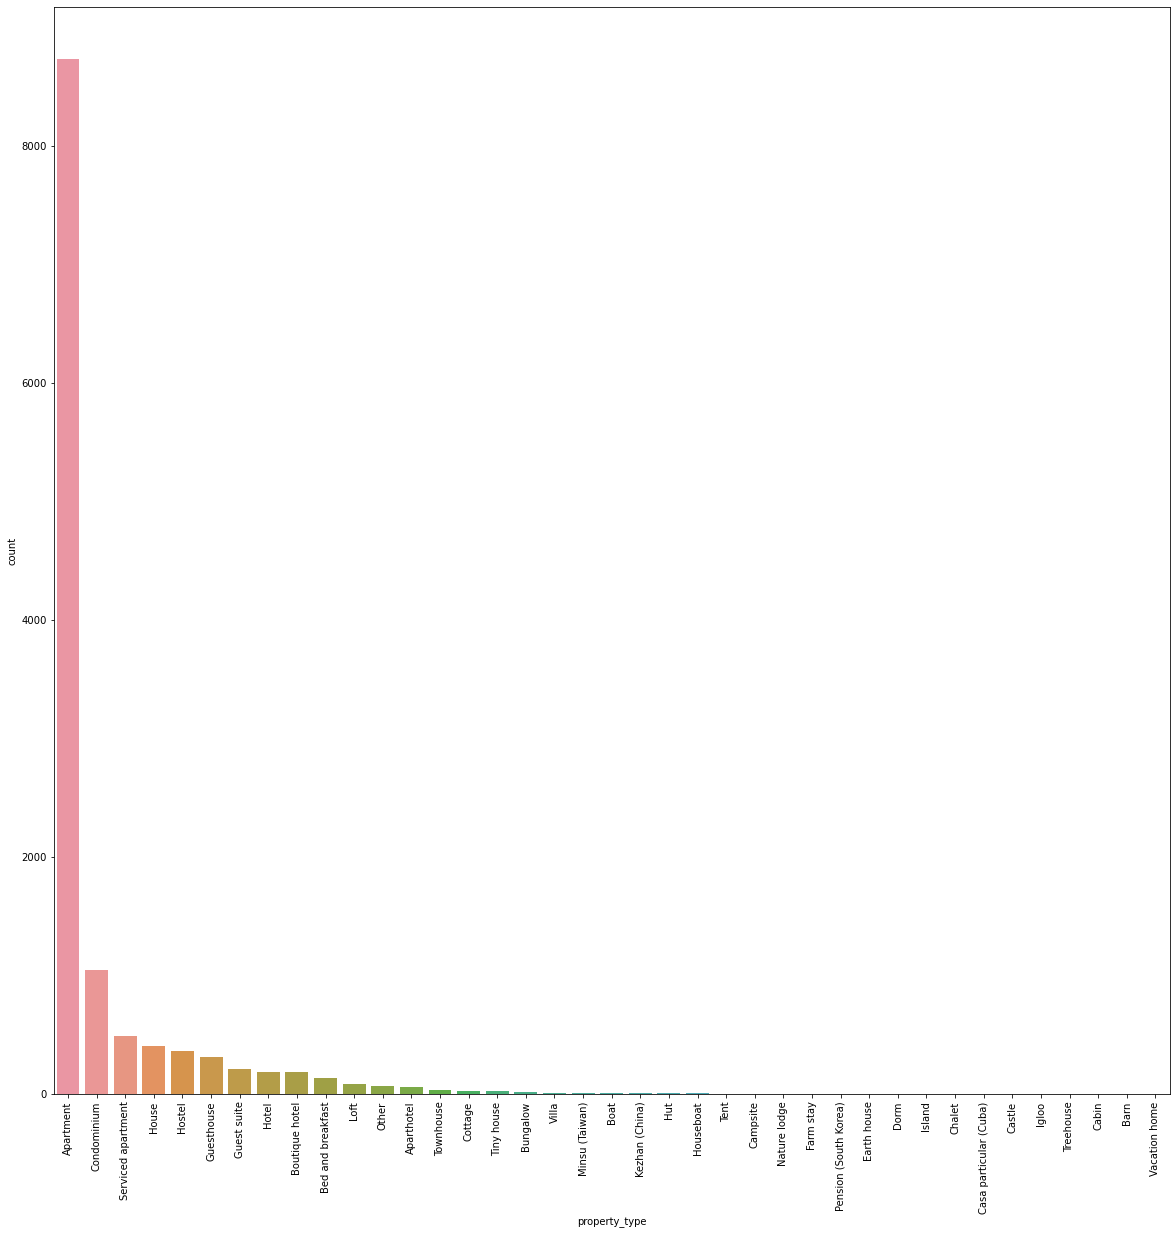

In [32]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.countplot(x=(filtered_listing)[('property_type')], order = filtered_listing['property_type'].value_counts().index)
plt.show()

Cant really tell from this as the category looks a bit messy...Lets try 'room_type'..

In [33]:
filtered_listing['room_type'].value_counts()

Entire home/apt    5912
Private room       5605
Shared room         670
Hotel room          298
Name: room_type, dtype: int64

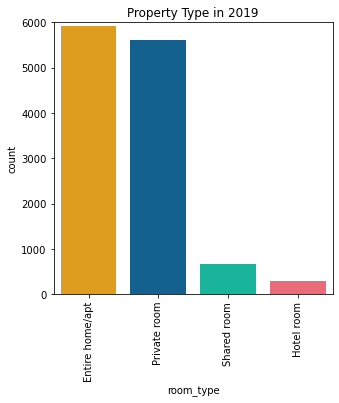

In [69]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=90)
sns.countplot(x=(filtered_listing)[('room_type')], order = filtered_listing['room_type'].value_counts().index, palette=['#FFA700','#0065A2','#00CDAC','#FF5768'])
plt.title('Property Type in 2019')
plt.ylim(0, 6000)
plt.show()

That's much better. Most of the airbnb listings in Hong Kong are private room!

what is the most popular neighbourhood? (Or the neighbourhood that has highest number of listings)

In [35]:
(filtered_listing['neighbourhood_cleansed'].value_counts())/(filtered_listing['neighbourhood_cleansed'].count())

Yau Tsim Mong        0.370525
Central & Western    0.211294
Wan Chai             0.188867
Islands              0.042131
Kowloon City         0.039728
Eastern              0.031798
Sham Shui Po         0.021626
North                0.019624
Yuen Long            0.018182
Sai Kung             0.012735
Sha Tin              0.010252
Southern             0.007849
Tsuen Wan            0.006488
Kwun Tong            0.005126
Tai Po               0.004565
Tuen Mun             0.003925
Kwai Tsing           0.003364
Wong Tai Sin         0.001922
Name: neighbourhood_cleansed, dtype: float64

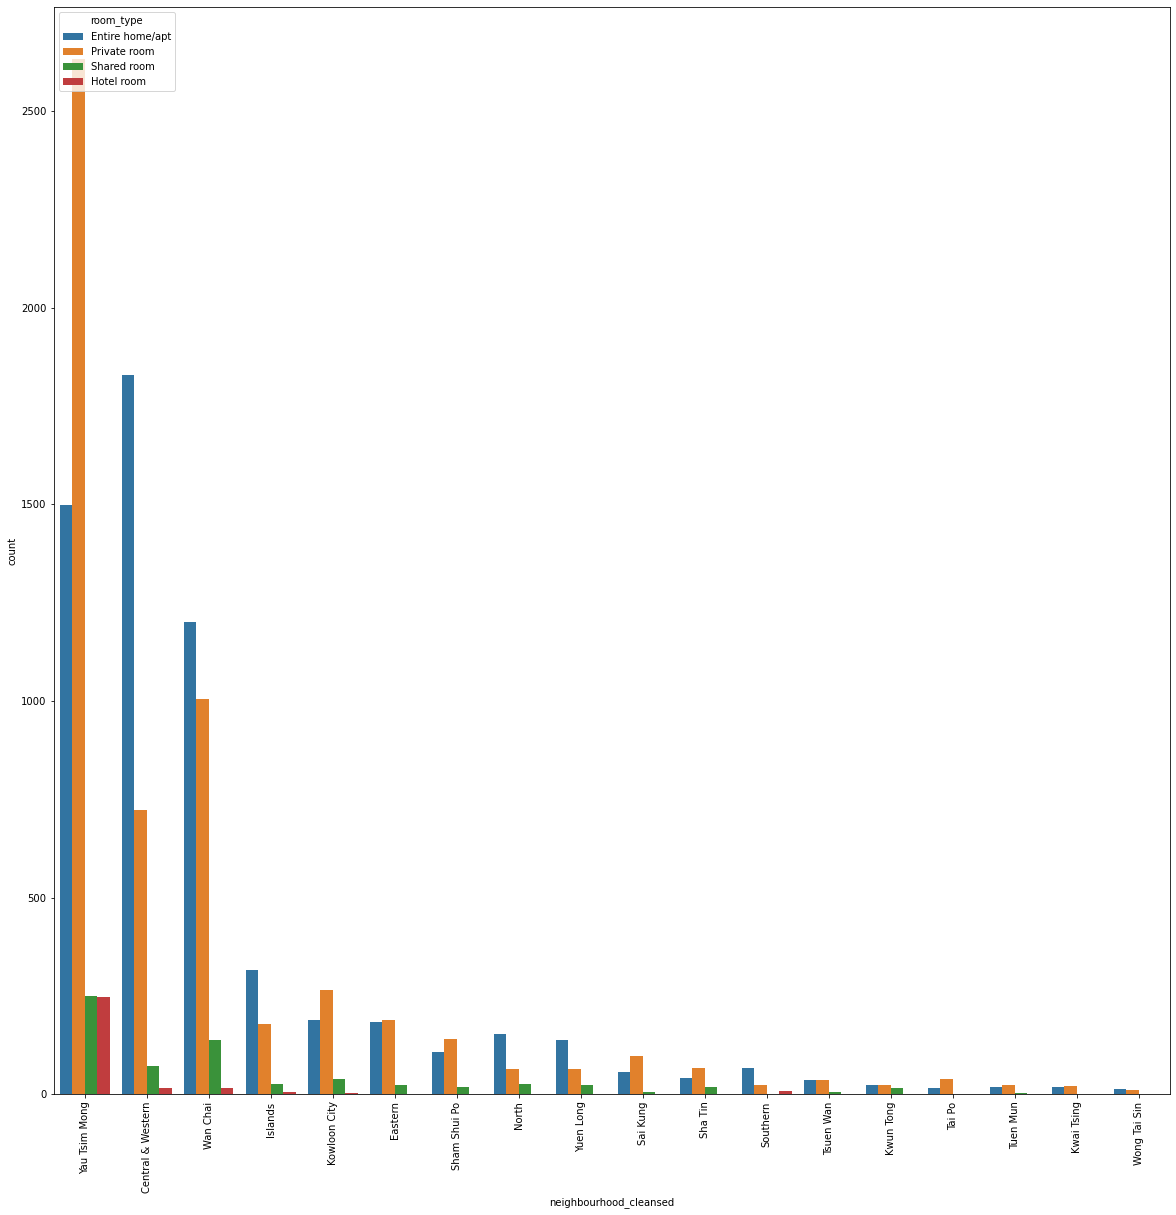

In [36]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.countplot(x=(filtered_listing)[('neighbourhood_cleansed')], hue= filtered_listing['room_type'], order = filtered_listing['neighbourhood_cleansed'].value_counts().index)
plt.show()



<AxesSubplot:xlabel='neighbourhood_cleansed'>

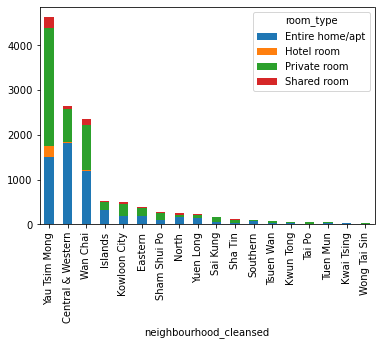

In [37]:
#A Stacked bar chart

df_plot = filtered_listing.groupby(['room_type', 'neighbourhood_cleansed']).size().reset_index().pivot(columns='room_type', index='neighbourhood_cleansed', values=0)
df_plot = df_plot.fillna(0)

df_plot['total'] = df_plot['Private room'] + df_plot['Entire home/apt'] + df_plot['Shared room'] + df_plot['Hotel room']
df_plot = df_plot.sort_values(by=['total'], ascending = False).drop(['total'], axis=1)
df_plot.plot(kind='bar', stacked=True)


In [38]:
neighbourhood_count = filtered_listing.groupby('neighbourhood_cleansed').property_type.count().sort_values(ascending=False).reset_index()
neighbourhood_count = neighbourhood_count.rename(columns={"property_type": "property_count"})
#neighbourhood_count.info() 
neighbourhood_count

,neighbourhood_cleansed,property_count
0,Yau Tsim Mong,4626
1,Central & Western,2638
2,Wan Chai,2358
3,Islands,526
4,Kowloon City,496
5,Eastern,397
6,Sham Shui Po,270
7,North,245
8,Yuen Long,227
9,Sai Kung,159


The following plot also indicate where these listings are concentrated. 

In [70]:

#Creates a map of Hong Kong.
m = folium.Map(location=[22.34, 114.1], zoom_start = 11)
m.save('2019.html')


#Takes the latitude and longitude coordinates and zips them into a form to be plotted.
lat = pd.to_numeric(filtered_listing['latitude'], errors = 'coerce')
lon = pd.to_numeric(filtered_listing['longitude'], errors = 'coerce')

#Zip togethers each list of latitude and longitude coordinates. 
lat_lon = list(zip(lat,lon))


mc = MarkerCluster().add_to(m)
for i in range(0,len(filtered_listing)):
    folium.Marker(location=lat_lon[i]).add_to(mc)

m.save('2019.html')
display(m)


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'accommodates'}>,
        <AxesSubplot:title={'center':'review_scores_value'}>],
       [<AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>, <AxesSubplot:>]],
      dtype=object)

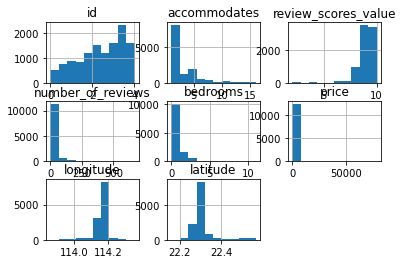

In [40]:
filtered_listing.hist()

Lets try to build a price model. The pricing data in calendar reflect pricing changes throughout the year so it should be used instead of the price column on the listing dataframe. Lets merge them and use price data in calendar. 


In [41]:
filtered_listing.rename(index=str, columns={"id": "listing_id"}, inplace= True)
filtered_listing_merged = pd.merge(filtered_listing, calendar , on= 'listing_id')

#changing categorial variable into binary dummies
filtered_listing_merged = pd.get_dummies(filtered_listing_merged, columns=["room_type", "neighbourhood_cleansed"], prefix=["room_type", "neighbourhood"])
filtered_listing_merged

#plt.figure(figsize = (16,16))
#sns.heatmap(filtered_listing2.corr(), annot=True, fmt=".2f");

,listing_id,property_type,accommodates,review_scores_value,number_of_reviews,bedrooms,price_x,longitude,latitude,date,...,neighbourhood_Sha Tin,neighbourhood_Sham Shui Po,neighbourhood_Southern,neighbourhood_Tai Po,neighbourhood_Tsuen Wan,neighbourhood_Tuen Mun,neighbourhood_Wan Chai,neighbourhood_Wong Tai Sin,neighbourhood_Yau Tsim Mong,neighbourhood_Yuen Long
0,69074,Apartment,3,9.0,133,1.0,1409.0,114.15018,22.28352,2019-11-19,...,0,0,0,0,0,0,0,0,0,0
1,69074,Apartment,3,9.0,133,1.0,1409.0,114.15018,22.28352,2019-11-20,...,0,0,0,0,0,0,0,0,0,0
2,69074,Apartment,3,9.0,133,1.0,1409.0,114.15018,22.28352,2019-11-21,...,0,0,0,0,0,0,0,0,0,0
3,69074,Apartment,3,9.0,133,1.0,1409.0,114.15018,22.28352,2019-11-22,...,0,0,0,0,0,0,0,0,0,0
4,69074,Apartment,3,9.0,133,1.0,1409.0,114.15018,22.28352,2019-11-23,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4557020,40214032,Apartment,4,NaN,0,2.0,525.0,114.13429,22.54513,2020-11-13,...,0,0,0,0,0,0,0,0,0,0
4557021,40214032,Apartment,4,NaN,0,2.0,525.0,114.13429,22.54513,2020-11-14,...,0,0,0,0,0,0,0,0,0,0
4557022,40214032,Apartment,4,NaN,0,2.0,525.0,114.13429,22.54513,2020-11-15,...,0,0,0,0,0,0,0,0,0,0
4557023,40214032,Apartment,4,NaN,0,2.0,525.0,114.13429,22.54513,2020-11-16,...,0,0,0,0,0,0,0,0,0,0


Attempt 1: drop NA

In [42]:
test = filtered_listing_merged.dropna()

#Split into explanatory and response variables

X = test.drop(['price_x','price_y','adjusted_price','property_type','date','listing_id','longitude','latitude','minimum_nights','maximum_nights'], axis=1)
y = test['adjusted_price']

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2954869 entries, 0 to 4524539
Data columns (total 30 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   accommodates                     int64  
 1   review_scores_value              float64
 2   number_of_reviews                int64  
 3   bedrooms                         float64
 4   available                        bool   
 5   month                            int64  
 6   year                             int64  
 7   day_of_week                      int64  
 8   room_type_Entire home/apt        uint8  
 9   room_type_Hotel room             uint8  
 10  room_type_Private room           uint8  
 11  room_type_Shared room            uint8  
 12  neighbourhood_Central & Western  uint8  
 13  neighbourhood_Eastern            uint8  
 14  neighbourhood_Islands            uint8  
 15  neighbourhood_Kowloon City       uint8  
 16  neighbourhood_Kwai Tsing         uint8  
 17  neighbou

In [44]:

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict and score the model
y_train_preds = lm_model.predict(X_train) 
y_test_preds = lm_model.predict(X_test) 


train_score = r2_score(y_train,y_train_preds)
test_score = r2_score(y_test, y_test_preds)#r2_score

print('Linear Regression r2 score => train: %.3f, test: %.3f' % (
        train_score,
        test_score))


Linear Regression r2 score => train: 0.070, test: 0.070


In [45]:
#Random Forest Regressor model
forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state=42, 
                               n_jobs=-1)
forest.fit(X_train, y_train.squeeze())

#calculate scores for the model
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

print('Random Forest MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

Random Forest MSE train: 577349.731, test: 741366.620
Random Forest R^2 train: 0.716, test: 0.638


Lets try to use more variables!

In [46]:
filtered_listing_long = detail_listing[['id',
'bedrooms',
'host_is_superhost',
'host_listings_count',
'host_total_listings_count',
'neighbourhood_cleansed',
#'latitude',
#'longitude',
'room_type',
'accommodates',
'number_of_reviews',
'number_of_reviews_ltm',
'review_scores_rating',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value',
'instant_bookable',
#'calculated_host_listings_count',
#'calculated_host_listings_count_entire_homes',
#'calculated_host_listings_count_private_rooms',
#'calculated_host_listings_count_shared_rooms',
#'reviews_per_month'
                                       ]].copy()



filtered_listing_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           12485 non-null  int64  
 1   bedrooms                     12452 non-null  float64
 2   host_is_superhost            12483 non-null  object 
 3   host_listings_count          12483 non-null  float64
 4   host_total_listings_count    12483 non-null  float64
 5   neighbourhood_cleansed       12485 non-null  object 
 6   room_type                    12485 non-null  object 
 7   accommodates                 12485 non-null  int64  
 8   number_of_reviews            12485 non-null  int64  
 9   number_of_reviews_ltm        12485 non-null  int64  
 10  review_scores_rating         8113 non-null   float64
 11  review_scores_accuracy       8110 non-null   float64
 12  review_scores_cleanliness    8111 non-null   float64
 13  review_scores_ch

In [47]:
#convert available into boolean
filtered_listing_long['host_is_superhost'] = filtered_listing_long['host_is_superhost'].map(d)
filtered_listing_long['instant_bookable'] = filtered_listing_long['instant_bookable'].map(d)

filtered_listing_long.rename(index=str, columns={"id": "listing_id"}, inplace= True)
filtered_listing_long_merged = pd.merge(filtered_listing_long, calendar , on= 'listing_id')

filtered_listing_long_merged = pd.get_dummies(filtered_listing_long_merged, columns=["room_type", "neighbourhood_cleansed"], prefix=["room_type", "neighbourhood"])
filtered_listing_long_merged

,listing_id,bedrooms,host_is_superhost,host_listings_count,host_total_listings_count,accommodates,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,...,neighbourhood_Sha Tin,neighbourhood_Sham Shui Po,neighbourhood_Southern,neighbourhood_Tai Po,neighbourhood_Tsuen Wan,neighbourhood_Tuen Mun,neighbourhood_Wan Chai,neighbourhood_Wong Tai Sin,neighbourhood_Yau Tsim Mong,neighbourhood_Yuen Long
0,69074,1.0,False,2.0,2.0,3,133,17,97.0,10.0,...,0,0,0,0,0,0,0,0,0,0
1,69074,1.0,False,2.0,2.0,3,133,17,97.0,10.0,...,0,0,0,0,0,0,0,0,0,0
2,69074,1.0,False,2.0,2.0,3,133,17,97.0,10.0,...,0,0,0,0,0,0,0,0,0,0
3,69074,1.0,False,2.0,2.0,3,133,17,97.0,10.0,...,0,0,0,0,0,0,0,0,0,0
4,69074,1.0,False,2.0,2.0,3,133,17,97.0,10.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4557020,40214032,2.0,False,7.0,7.0,4,0,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4557021,40214032,2.0,False,7.0,7.0,4,0,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4557022,40214032,2.0,False,7.0,7.0,4,0,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4557023,40214032,2.0,False,7.0,7.0,4,0,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [48]:
filtered_listing_long_merged.shape

(4557025, 47)

In [49]:
filtered_listing_long_merged.isnull().mean()

listing_id                         0.000000
bedrooms                           0.002643
host_is_superhost                  0.000160
host_listings_count                0.000160
host_total_listings_count          0.000160
accommodates                       0.000000
number_of_reviews                  0.000000
number_of_reviews_ltm              0.000000
review_scores_rating               0.350180
review_scores_accuracy             0.350421
review_scores_cleanliness          0.350340
review_scores_checkin              0.350340
review_scores_communication        0.350501
review_scores_location             0.350581
review_scores_value                0.350581
instant_bookable                   0.000000
date                               0.000000
available                          0.000000
price                              0.000113
adjusted_price                     0.000113
minimum_nights                     0.000000
maximum_nights                     0.000000
month                           

In [50]:
filtered_listing_long_merged.dropna().shape

(2953044, 47)

Attempt 2: long listing, drop NA

In [51]:
filtered_listing_long_merged_test = filtered_listing_long_merged.dropna()

#filtered_listing_long_merged_test = filtered_listing_long_merged.fillna(0)

#Split into explanatory and response variables


X = filtered_listing_long_merged_test.drop(['price','adjusted_price','date','listing_id'], axis=1)
y = filtered_listing_long_merged_test['adjusted_price']

In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2953044 entries, 0 to 4524539
Data columns (total 43 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   bedrooms                         float64
 1   host_is_superhost                object 
 2   host_listings_count              float64
 3   host_total_listings_count        float64
 4   accommodates                     int64  
 5   number_of_reviews                int64  
 6   number_of_reviews_ltm            int64  
 7   review_scores_rating             float64
 8   review_scores_accuracy           float64
 9   review_scores_cleanliness        float64
 10  review_scores_checkin            float64
 11  review_scores_communication      float64
 12  review_scores_location           float64
 13  review_scores_value              float64
 14  instant_bookable                 bool   
 15  available                        bool   
 16  minimum_nights                   int64  
 17  maximum_

In [53]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)


In [54]:

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict and score the model
y_train_preds = lm_model.predict(X_train) 
y_test_preds = lm_model.predict(X_test) 


train_score = r2_score(y_train,y_train_preds)
test_score = r2_score(y_test, y_test_preds)#r2_score

print('Linear Regression r2 score => train: %.3f, test: %.3f' % (
        train_score,
        test_score))

Linear Regression r2 score => train: 0.074, test: 0.073


In [67]:
#Using a Random Forest Regressor model
forest = RandomForestRegressor(n_estimators=100, 
                               random_state=42, 
                               max_depth=10,
                               n_jobs=-1)
forest.fit(X_train, y_train)

#calculate scores for the model
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

print('Random Forest MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

Random Forest MSE train: 297767.530, test: 296739.390
Random Forest R^2 train: 0.853, test: 0.857


In [56]:
calendar_2020 = pd.read_csv('2020_hongkong_calendar.csv')
detail_listing_2020 = pd.read_csv('2020_hongkong_listings.csv') 
detail_reviews_2020 = pd.read_csv('2020_hongkong_reviews.csv') 

In [57]:
#convert date into date datatype
calendar_2020['date'] = pd.to_datetime(calendar_2020['date'])
calendar_2020['month'] = pd.to_datetime(calendar_2020['date']).dt.month
calendar_2020['year'] = pd.to_datetime(calendar_2020['date']).dt.year
calendar_2020['day_of_week'] = pd.to_datetime(calendar_2020['date']).dt.dayofweek

#convert prices into numbers
calendar_2020['price'] = pd.to_numeric(calendar_2020['price'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')
calendar_2020['adjusted_price'] = pd.to_numeric(calendar_2020['adjusted_price'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')

#convert available into boolean
d = {'t': True, 'f': False}
calendar_2020['available'] = calendar_2020['available'].map(d)

In [58]:
filtered_listing_long_2020 = detail_listing_2020[['id',
'bedrooms',
'host_is_superhost',
'host_listings_count',
'host_total_listings_count',
'neighbourhood_cleansed',
#'latitude',
#'longitude',
'room_type',
'accommodates',
'number_of_reviews',
'number_of_reviews_ltm',
'review_scores_rating',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value',
'instant_bookable',
#'calculated_host_listings_count',
#'calculated_host_listings_count_entire_homes',
#'calculated_host_listings_count_private_rooms',
#'calculated_host_listings_count_shared_rooms',
#'reviews_per_month'
                                       ]].copy()



filtered_listing_long_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7226 entries, 0 to 7225
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           7226 non-null   int64  
 1   bedrooms                     5924 non-null   float64
 2   host_is_superhost            7226 non-null   object 
 3   host_listings_count          7226 non-null   int64  
 4   host_total_listings_count    7226 non-null   int64  
 5   neighbourhood_cleansed       7226 non-null   object 
 6   room_type                    7226 non-null   object 
 7   accommodates                 7226 non-null   int64  
 8   number_of_reviews            7226 non-null   int64  
 9   number_of_reviews_ltm        7226 non-null   int64  
 10  review_scores_rating         3896 non-null   float64
 11  review_scores_accuracy       3896 non-null   float64
 12  review_scores_cleanliness    3896 non-null   float64
 13  review_scores_chec

In [59]:
#convert available into boolean
filtered_listing_long_2020['host_is_superhost'] = filtered_listing_long_2020['host_is_superhost'].map(d)
filtered_listing_long_2020['instant_bookable'] = filtered_listing_long_2020['instant_bookable'].map(d)

filtered_listing_long_2020.rename(index=str, columns={"id": "listing_id"}, inplace= True)
filtered_listing_long_merged_2020 = pd.merge(filtered_listing_long_2020, calendar_2020 , on= 'listing_id')

filtered_listing_long_merged_2020 = pd.get_dummies(filtered_listing_long_merged_2020, columns=["room_type", "neighbourhood_cleansed"], prefix=["room_type", "neighbourhood"])
filtered_listing_long_merged_2020

,listing_id,bedrooms,host_is_superhost,host_listings_count,host_total_listings_count,accommodates,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,...,neighbourhood_Sha Tin,neighbourhood_Sham Shui Po,neighbourhood_Southern,neighbourhood_Tai Po,neighbourhood_Tsuen Wan,neighbourhood_Tuen Mun,neighbourhood_Wan Chai,neighbourhood_Wong Tai Sin,neighbourhood_Yau Tsim Mong,neighbourhood_Yuen Long
0,69074,1.0,True,2,2,3,134,1,97.0,10.0,...,0,0,0,0,0,0,0,0,0,0
1,69074,1.0,True,2,2,3,134,1,97.0,10.0,...,0,0,0,0,0,0,0,0,0,0
2,69074,1.0,True,2,2,3,134,1,97.0,10.0,...,0,0,0,0,0,0,0,0,0,0
3,69074,1.0,True,2,2,3,134,1,97.0,10.0,...,0,0,0,0,0,0,0,0,0,0
4,69074,1.0,True,2,2,3,134,1,97.0,10.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2637485,46343317,1.0,False,0,0,2,0,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2637486,46343317,1.0,False,0,0,2,0,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2637487,46343317,1.0,False,0,0,2,0,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2637488,46343317,1.0,False,0,0,2,0,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [60]:
filtered_listing_long_merged_test_2020 = filtered_listing_long_merged_2020.dropna()

#Split into explanatory and response variables


X_2020 = filtered_listing_long_merged_test_2020.drop(['price','adjusted_price','date','listing_id'], axis=1)
y_2020 = filtered_listing_long_merged_test_2020['adjusted_price']

In [61]:
X_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1189900 entries, 0 to 2618509
Data columns (total 43 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   bedrooms                         1189900 non-null  float64
 1   host_is_superhost                1189900 non-null  bool   
 2   host_listings_count              1189900 non-null  int64  
 3   host_total_listings_count        1189900 non-null  int64  
 4   accommodates                     1189900 non-null  int64  
 5   number_of_reviews                1189900 non-null  int64  
 6   number_of_reviews_ltm            1189900 non-null  int64  
 7   review_scores_rating             1189900 non-null  float64
 8   review_scores_accuracy           1189900 non-null  float64
 9   review_scores_cleanliness        1189900 non-null  float64
 10  review_scores_checkin            1189900 non-null  float64
 11  review_scores_communication      1189900 non-null 

In [64]:
#calculate scores for the model
y_2020_preds = forest.predict(X_2020)


print('Random Forest R^2 2020: %.3f' % (
        r2_score(y_2020, y_2020_preds)))

Random Forest R^2 2020: -0.107
